In [103]:
#Import some library
import pandas as pd
import numpy as np
import seaborn as sns

In [104]:
#Upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AppleStore.csv to AppleStore (1).csv
User uploaded file "AppleStore.csv" with length 837657 bytes


In [105]:
#Read the data
data = pd.read_csv("AppleStore.csv")
#data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [106]:
#Show shape of data
print("Shape",np.shape(data))

Shape (7197, 17)


In [107]:
#Show non null data if exist
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [108]:
#Show head of data
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [109]:
#Removing some variables that not used 
data = data.drop(["Unnamed: 0","id","currency","rating_count_ver","user_rating_ver","ver","sup_devices.num","ipadSc_urls.num","lang.num","vpp_lic"], axis=1)

In [110]:
#Show head of data after removing some variables
data.head(5)

,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping
4,Bible,92774400,0.00,985920,4.5,4+,Reference


In [111]:
#Show if the data has missing value
data.isnull().any()

track_name          False
size_bytes          False
price               False
rating_count_tot    False
user_rating         False
cont_rating         False
prime_genre         False
dtype: bool

In [112]:
#Aggregate the missing values if any
data.isnull().sum()

track_name          0
size_bytes          0
price               0
rating_count_tot    0
user_rating         0
cont_rating         0
prime_genre         0
dtype: int64

In [113]:
#Show the descriptive of data
data.describe(include="all")

,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre
count,7197,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197,7197
unique,7195,NaN,NaN,NaN,NaN,4,23
top,VR Roller Coaster,NaN,NaN,NaN,NaN,4+,Games
freq,2,NaN,NaN,NaN,NaN,4433,3862
mean,NaN,1.991345e+08,1.726218,1.289291e+04,3.526956,NaN,NaN
std,NaN,3.592069e+08,5.833006,7.573941e+04,1.517948,NaN,NaN
min,NaN,5.898240e+05,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,NaN,4.692275e+07,0.000000,2.800000e+01,3.500000,NaN,NaN
50%,NaN,9.715302e+07,0.000000,3.000000e+02,4.000000,NaN,NaN
75%,NaN,1.819249e+08,1.990000,2.793000e+03,4.500000,NaN,NaN


In [114]:
#Rename some variables
data = data.rename(columns = {"track_name" : "Name", "size_bytes" : "Size", "price" : "Price", "rating_count_tot" : "Reviews", "user_rating" : "Rating", "cont_rating" : "Content_Rating", "prime_genre" : "Category"})
data.head(2)

,Name,Size,Price,Reviews,Rating,Content_Rating,Category
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity


In [115]:
#Make a new variable named Type 
data.loc[(data["Price"] >= 0), "Type"] = "Paid"
data.loc[(data["Price"] == 0), "Type"] = "Free"
data.head(2)

,Name,Size,Price,Reviews,Rating,Content_Rating,Category,Type
0,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,Paid
1,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,Free


In [116]:
#Show list name in Category
data.Category.unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [117]:
#Count values every item in Category
data.Category.value_counts().head()

Games            3862
Entertainment     535
Education         453
Photo & Video     349
Utilities         248
Name: Category, dtype: int64

In [118]:
import matplotlib.pyplot as plt

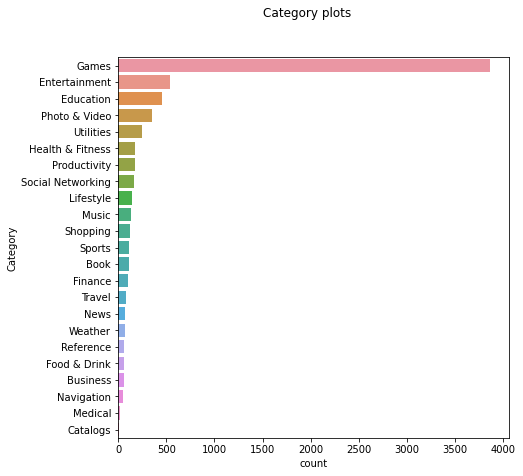

In [119]:
#Visualizing of Category
fig, ax1=plt.subplots(figsize=(7,7))
plt.suptitle("Category plots")
sns.countplot(y="Category", data=data, ax=ax1, order=data["Category"].value_counts().index)
plt.show()

In [120]:
#Show list name in Rating
data.Rating.unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 0. , 1.5, 1. ])

In [121]:
#Count values every item in Rating
data.Rating.value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: Rating, dtype: int64

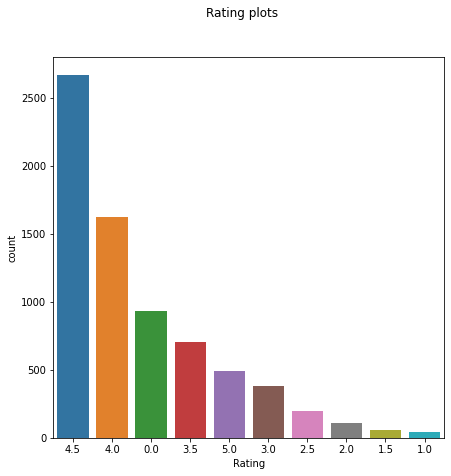

In [122]:
#Visualizing of Rating
fig, ax1=plt.subplots(figsize=(7,7))
plt.suptitle("Rating plots")
sns.countplot(x="Rating", data=data, ax=ax1, order=data["Rating"].value_counts().index)
plt.show()

In [123]:
#Count values every item in Type
data.Type.value_counts()

Free    4056
Paid    3141
Name: Type, dtype: int64

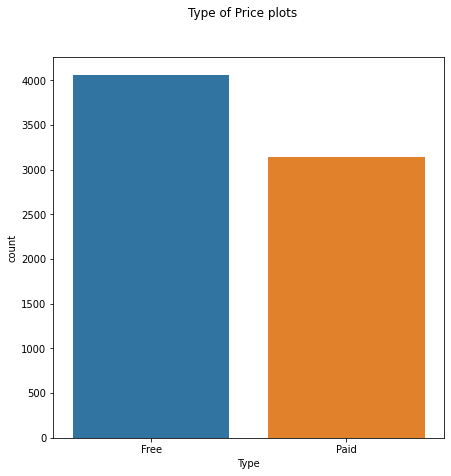

In [124]:
#Visualizing of Price Type 
fig, ax1=plt.subplots(figsize=(7,7))
plt.suptitle("Type of Price plots")
sns.countplot(x="Type", data=data, ax=ax1, order=data["Type"].value_counts().index)
plt.show()

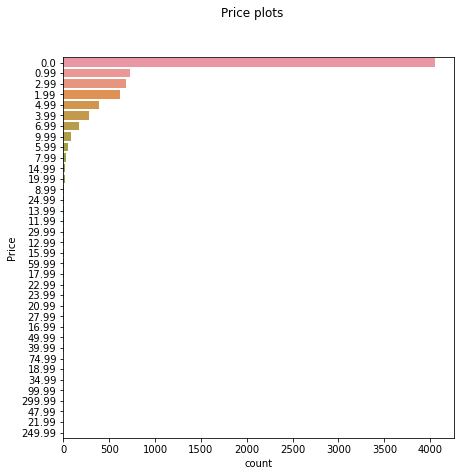

In [125]:
#Visualizing of Price
fig, ax1=plt.subplots(figsize=(7,7))
plt.suptitle("Price plots")
sns.countplot(y="Price", data=data, ax=ax1, order=data["Price"].value_counts().index)
plt.show()

In [126]:
#Count values every item in Content Rating
data["Content_Rating"].value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: Content_Rating, dtype: int64

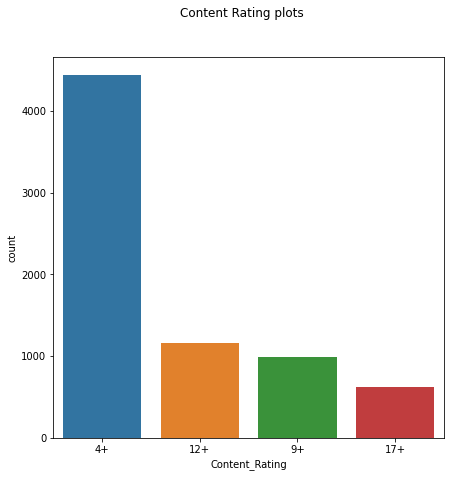

In [127]:
#Visualizing of Content Rating
fig, ax1=plt.subplots(figsize=(7,7))
plt.suptitle("Content Rating plots")
sns.countplot(x="Content_Rating", data=data, ax=ax1, order=data["Content_Rating"].value_counts().index)
plt.show()

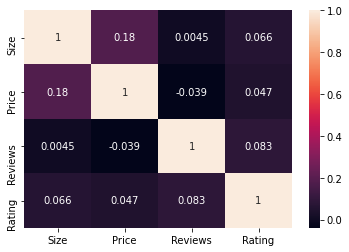

In [128]:
#See the correlation between variables
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [129]:
#Group and aggregate Category and Rating variables
grp = data.groupby("Category")
x = grp["Rating"].agg(np.mean)

Text(0, 0.5, 'Rating')

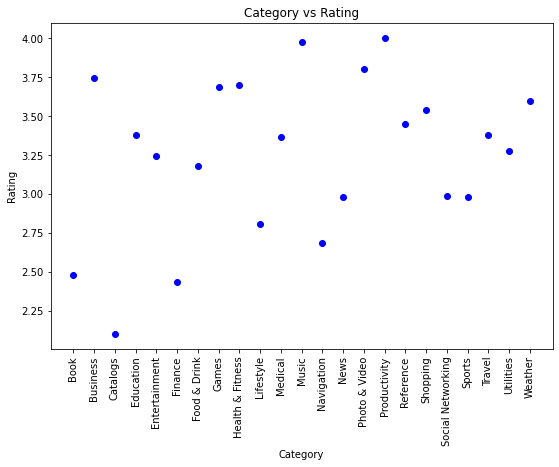

In [144]:
#Visualizing Category vs Rating
plt.figure(figsize=(9,6))
plt.plot(x, "ro", color="b")
plt.xticks(rotation=90)
plt.title("Category vs Rating")
plt.xlabel("Category")
plt.ylabel("Rating")

In [134]:
#Group and aggregate Category and Price variables
grp = data.groupby("Category")
y = grp["Price"].agg(np.sum)

Text(0, 0.5, 'Price')

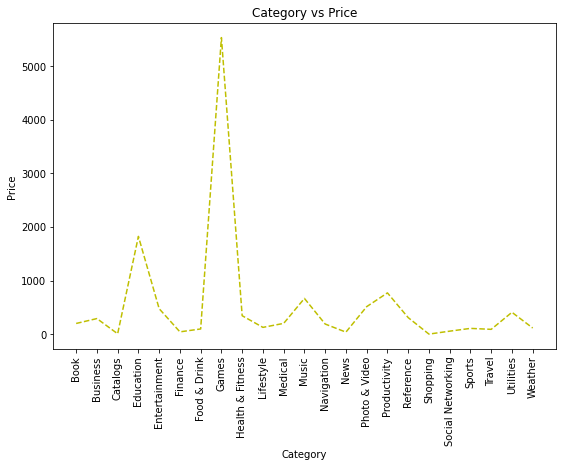

In [141]:
#Visualizing Category vs Price
plt.figure(figsize=(9,6))
plt.plot(y, "r--", color="y")
plt.xticks(rotation=90)
plt.title("Category vs Price")
plt.xlabel("Category")
plt.ylabel("Price")

In [137]:
#Group and aggregate Category and Reviews variables
grp = data.groupby("Category")
v = grp["Reviews"].agg(np.sum)

Text(0, 0.5, 'Reviews')

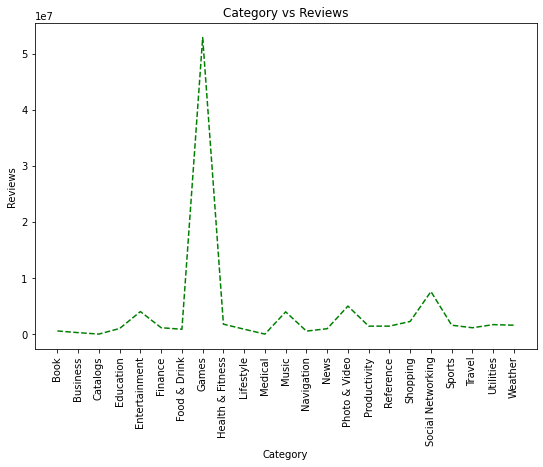

In [140]:
#Visualizing Category vs Reviews
plt.figure(figsize=(9,6))
plt.plot(v, "r--", color="g")
plt.xticks(rotation=90)
plt.title("Category vs Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")